In [1]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

#Machine Learning Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
crop = pd.read_csv("/content/Crop_recommendation.csv")

In [3]:
data =crop.copy()
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
#Mengecek Value Null
data.isnull().sum().any()

False

In [7]:
#Drop Duplicate Value
data = data.drop_duplicates()

In [8]:
#Memberikan angka untuk tiap label
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
data['Encoded_label'] = encod.fit_transform(data.label)
data

,N,P,K,temperature,humidity,ph,rainfall,label,Encoded_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [9]:
#encoded labels for classes 
a = pd.DataFrame(pd.unique(data.label));
a.rename(columns={0:'label'},inplace=True)
b = pd.DataFrame(pd.unique(data.Encoded_label));
b.rename(columns={0:'encoded'},inplace=True)
classes = pd.concat([a,b],axis=1).sort_values('encoded').set_index('label')
classes

,encoded
label,
apple,0
banana,1
blackgram,2
chickpea,3
coconut,4
coffee,5
cotton,6
grapes,7
jute,8


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

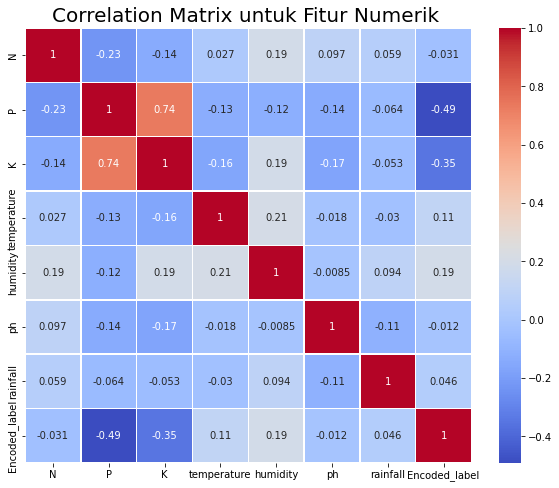

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [11]:
#membagi input dan output
x = data.iloc[:,:-2]
y = data.Encoded_label
print('Input variables \n',x.head())
print('\nOutput Variable\n',y.head())

Input variables 
     N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

Output Variable
 0    20
1    20
2    20
3    20
4    20
Name: Encoded_label, dtype: int64


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print('x_train = {}, x_test = {}, y_train = {}, y_test = {}'.format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

x_train = (1760, 7), x_test = (440, 7), y_train = (1760,), y_test = (440,)


###Numerical Scaler

In [23]:
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
scaler = StandardScaler()
scaler.fit(x_train[numerical_features])
x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])
x_train[numerical_features].head()

,N,P,K,temperature,humidity,ph,rainfall
1936,1.699918,-0.484501,-0.466543,-0.701713,0.365347,1.203562,-0.235519
610,-0.607210,-0.574434,-0.524526,0.776683,0.690041,0.903894,-0.792016
372,-1.068635,0.204991,-0.543854,-1.364886,-2.158976,-1.197074,0.582664
1559,-0.580067,2.543267,3.012433,-0.379593,1.003572,-0.390244,0.242997
1500,-0.715780,2.213510,2.838484,-0.554446,0.867192,-1.210827,0.128975


In [24]:
 x_test.loc[:, numerical_features] = scaler.transform(x_test[numerical_features])

In [25]:
 x_test.loc[:, numerical_features]

,N,P,K,temperature,humidity,ph,rainfall
2121,0.885638,-0.994125,-0.408560,-0.001418,-0.483431,1.305263,1.582504
960,-1.340062,-0.814257,-0.253939,-0.311939,0.985584,-0.999330,0.029871
952,-0.742923,-1.473771,-0.099318,-0.857533,1.026756,0.912225,0.076774
1958,1.781346,-0.064810,-0.582509,-0.516772,0.181955,-0.443805,-0.660717
681,-1.204349,-0.514479,-0.621164,0.493197,0.404581,0.391904,-1.187806
...,...,...,...,...,...,...,...
1684,-1.177206,-1.114036,-0.756458,-3.025777,0.890818,0.010655,0.054850
1477,0.967066,-1.084059,-0.079990,0.665843,0.868240,0.141082,-1.477192
851,-1.204349,0.294925,-0.505198,-0.439630,-0.174326,0.785814,-1.223472
370,-0.362925,0.055101,-0.466543,-0.690900,-2.311929,-0.883241,0.425801


Pembuatan model dan training

In [13]:
#K-Nearest Neigbors classifier
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)
KNNPrediction = KNN_model.predict(x_test)

#Decission Tree Classifier
decissionTree = DecisionTreeClassifier(criterion='entropy',random_state=0)
decissionTree.fit(x_train,y_train)
TreePrediction = decissionTree.predict(x_test)

#Support Vector Machine Classifier
SVM = LinearSVC(random_state=0, max_iter=1000000)
SVM.fit(x_train, y_train)
SVMPrediction = SVM.predict(x_test)

#Linear Regression
Logis = LogisticRegression()
Logis.fit(x_train,y_train)
LogisPred = Logis.predict(x_test)

#Random Forest
RForest = RandomForestClassifier()
RForest.fit(x_train,y_train)
RForestPred = RForest.predict(x_test)

#XGBoost
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgbPred = xgb.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [14]:
#classification report KNN
print('REPORT : \n',classification_report(y_test,KNNPrediction))
acc_logis = accuracy_score(y_test,KNNPrediction)

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.89      0.86      0.87        28
           9       0.93      1.00      0.97        14
          10       0.96      1.00      0.98        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      0.89      0.94        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

In [15]:
#classification report Decision Tree
print('REPORT : \n',classification_report(y_test,TreePrediction))
acc_logis = accuracy_score(y_test,TreePrediction)

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      0.93      0.91        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.89      0.94        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

In [16]:
#classification report SVM
print('REPORT : \n',classification_report(y_test,SVMPrediction))
acc_logis = accuracy_score(y_test,SVMPrediction)

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.88      0.88      0.88        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.87      1.00      0.93        20
           7       1.00      1.00      1.00        18
           8       0.75      0.64      0.69        28
           9       1.00      1.00      1.00        14
          10       0.88      0.96      0.92        23
          11       1.00      0.76      0.86        21
          12       1.00      1.00      1.00        26
          13       0.94      0.84      0.89        19
          14       1.00      0.96      0.98        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

In [17]:
#classification report Linear Regression
print('REPORT : \n',classification_report(y_test,LogisPred))
acc_logis = accuracy_score(y_test,LogisPred)

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.86      0.75      0.80        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.86      0.90      0.88        20
           7       1.00      1.00      1.00        18
           8       0.84      0.93      0.88        28
           9       1.00      1.00      1.00        14
          10       0.88      1.00      0.94        23
          11       0.90      0.86      0.88        21
          12       0.96      1.00      0.98        26
          13       0.84      0.84      0.84        19
          14       1.00      0.96      0.98        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

In [18]:
#classification report Random Forest
print('REPORT : \n',classification_report(y_test,RForestPred))
acc_logis = accuracy_score(y_test,RForestPred)

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      1.00      0.97        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

In [19]:
#classification report XGBoost
print('REPORT : \n',classification_report(y_test,xgbPred))
acc_logis = accuracy_score(y_test,xgbPred)

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.96      0.93      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

In [20]:
#Dari model diatas digunakan model Random Forest
param = {'n_estimators':range(10,50,10),
         'criterion':['gini'],
         'max_depth':range(1,20,2),
         'max_features':[1,2,3],
         'min_samples_leaf':range(1,10,2),
         }
grid_RForest = GridSearchCV(RForest,param,cv=5,n_jobs=-1,verbose=1)
grid_RForest.fit(x_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(1, 20, 2),
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': range(1, 10, 2),
                         'n_estimators': range(10, 50, 10)},
             verbose=1)

In [21]:
print(grid_RForest.best_params_)
print(grid_RForest.best_score_)

{'criterion': 'gini', 'max_depth': 11, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 30}
0.9965909090909092


Confusion Matrix : 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


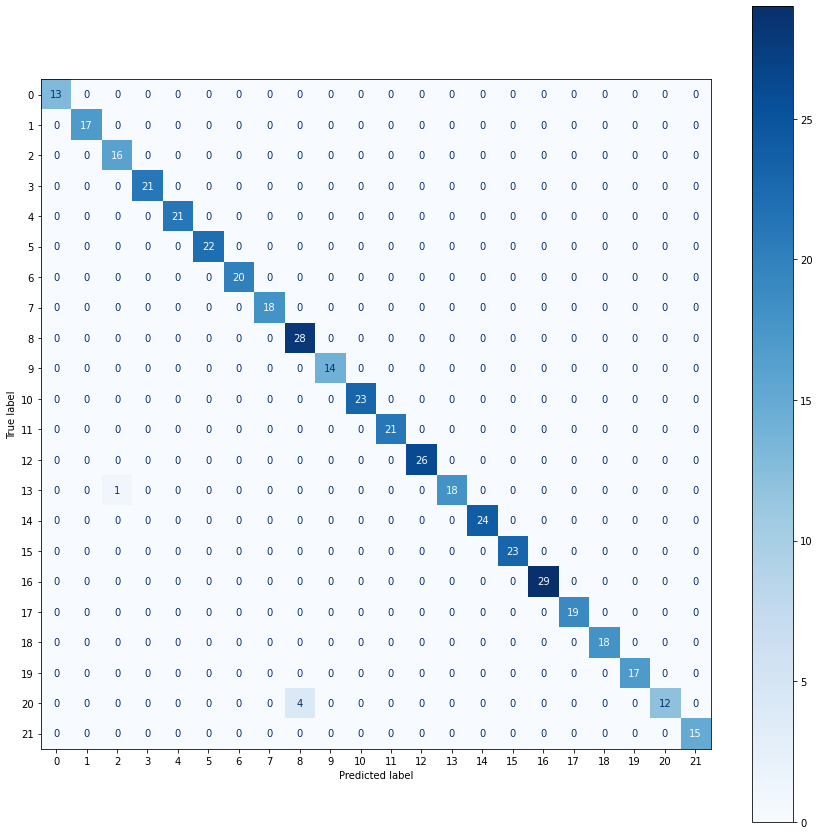

In [22]:
#predicting for test data and plotting confusion matrix
pred_rand = grid_RForest.predict(x_test)
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(grid_RForest,x_test,y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [23]:
#importing pickle file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_RForest,pickle_out)
pickle_out.close()

In [26]:
a = [[80,35,40,30,80,7.5,100]]
b = [[100, 15, 27, 27, 56, 6, 128]]

In [27]:
pickle_in = open('classifier.pkl','rb')
model = pickle.load(pickle_in)
pre = model.predict_proba(b)
pre = pd.DataFrame(data = np.round(pre.T*100,2), index=classes.index,columns=['predicted_values'])
pre

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


,predicted_values
label,
apple,0.00
banana,0.00
blackgram,0.00
chickpea,0.00
coconut,0.00
coffee,95.24
cotton,0.00
grapes,0.00
jute,0.00
